In [2]:
from __future__ import division
from scipy.constants import physical_constants
# import BGW_utils as BGW_utils
import sys

import numpy as np

import subprocess
import h5py

import matplotlib.pyplot as plt
#%matplotlib inline
config_dir = '/Users/rdelgrande/work/presentation.mplstyle'
plt.style.use(config_dir)


sys.path.insert(0, '/Users/rdelgrande/work/Codes/utilities/BGW')


# Constants
# ref: https://docs.scipy.org/doc/scipy/reference/constants.html#
Ry2eV = physical_constants["Rydberg constant times hc in eV"][0]
bohr2A = physical_constants["Bohr radius"][0]*1e10
Ha2eV = Ry2eV*2


In [3]:
import func_GW_data

import importlib        
importlib.reload(func_GW_data)


<module 'func_GW_data' from '/Users/rdelgrande/work/Projects/MAPI/ANALYSIS/func_GW_data.py'>

# Loading data

In [4]:

data_dir = '/Users/rdelgrande/work/TEMP_DATA/gw_bse_cubic_MAPI/BGW_new_pinnacles/'

In [5]:
# loading eigenenergies

eigvals_file = data_dir + 'Absorption_new/eigenvalues.dat'
data = np.loadtxt(eigvals_file)

eigvals = data[:, 0]
dipole_abs = data[:, 1]
print('Brightest exciton (Nk=6)', np.argmax(dipole_abs), ' with E = ', eigvals[np.argmax(dipole_abs)])

eigvals_file = data_dir + 'Absorption_new_8kpts/eigenvalues.dat'
data = np.loadtxt(eigvals_file)

eigvals_8ktps = data[:, 0]
dipole_abs_8kpts = data[:, 1]
print('Brightest exciton (Nk=8)', np.argmax(dipole_abs_8kpts), ' with E = ', eigvals_8ktps[np.argmax(dipole_abs_8kpts)])


eigvals_file = data_dir + 'Absorption_new_10kpts/eigenvalues.dat'
data = np.loadtxt(eigvals_file)

eigvals_10ktps = data[:, 0]
dipole_abs_10kpts = data[:, 1]
print('Brightest exciton (Nk=10)', np.argmax(dipole_abs_10kpts), ' with E = ', eigvals_10ktps[np.argmax(dipole_abs_10kpts)])



print(len(eigvals), len(eigvals_8ktps), len(eigvals_10ktps))

Brightest exciton (Nk=6) 23  with E =  2.8932371
Brightest exciton (Nk=8) 51  with E =  2.986678
Brightest exciton (Nk=10) 104  with E =  3.0737479
5400 10240 20000


In [6]:
print(eigvals_10ktps[0], eigvals_10ktps[1])

2.2927488 2.3006252


# Absorption spectra

In [7]:
absorption_6kpts = np.loadtxt(data_dir + 'Absorption_new/absorption_eh.dat')
absorption_8kpts = np.loadtxt(data_dir + 'Absorption_new_8kpts/absorption_eh.dat')
absorption_10kpts = np.loadtxt(data_dir + 'Absorption_new_10kpts/absorption_eh.dat')

dipole_abs = dipole_abs / np.max(dipole_abs) * np.max(absorption_6kpts[:, 1])
dipole_abs_8kpts = dipole_abs_8kpts / np.max(dipole_abs_8kpts) * np.max(absorption_8kpts[:, 1])
dipole_abs_10kpts = dipole_abs_10kpts / np.max(dipole_abs_10kpts) * np.max(absorption_10kpts[:, 1])

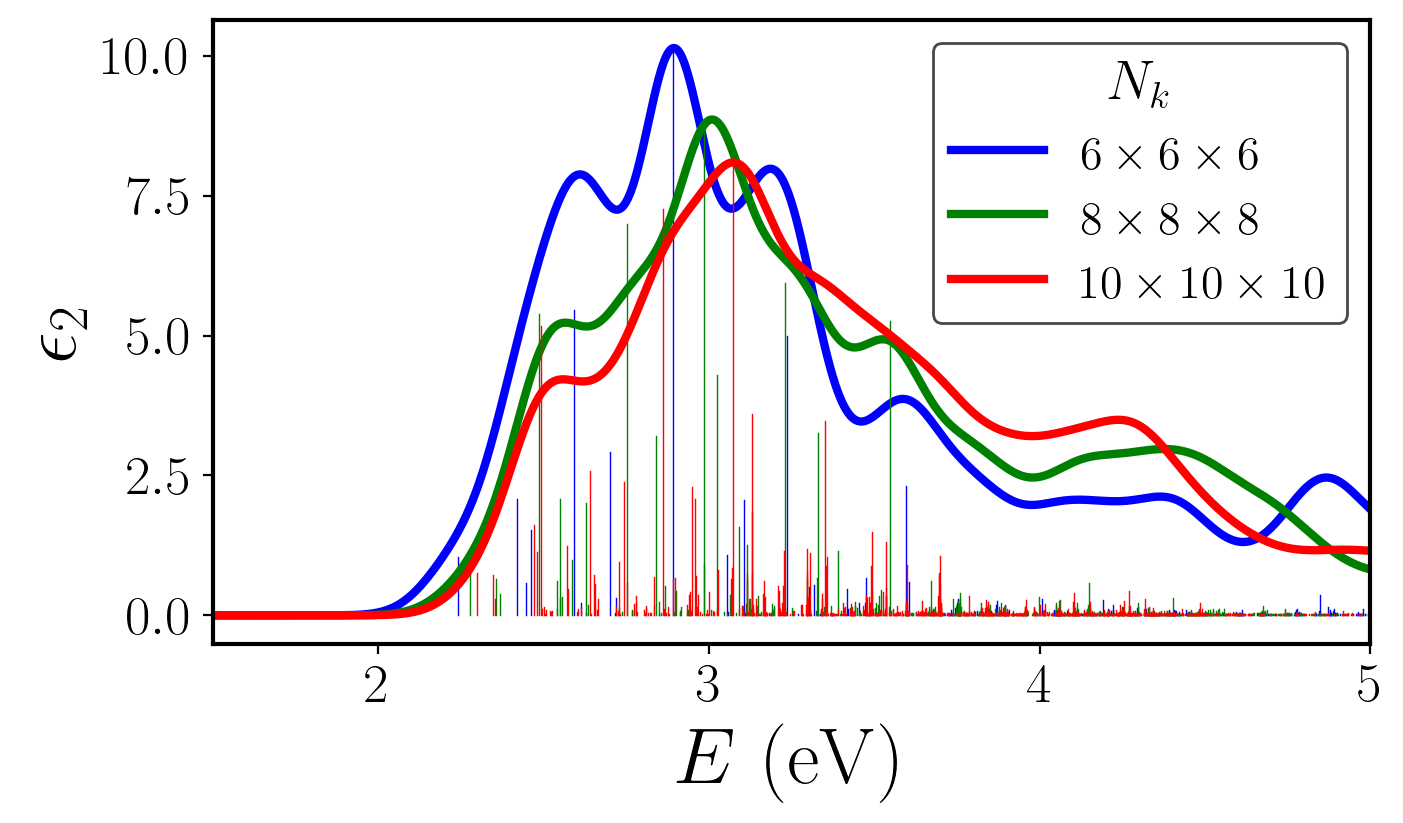

In [8]:
plt.figure(figsize=(7,4))

plt.plot(absorption_6kpts[:, 0], absorption_6kpts[:, 1], label = r'$6 \times 6 \times 6$', color='b')

for i in range(len(eigvals)):
    plt.plot([eigvals[i], eigvals[i]], [0, dipole_abs[i]], color = 'b', linewidth = 0.5)

plt.plot(absorption_8kpts[:, 0], absorption_8kpts[:, 1], label = r'$8 \times 8 \times 8$', color='g')

for i in range(len(eigvals_8ktps)):
    plt.plot([eigvals_8ktps[i], eigvals_8ktps[i]], [0, dipole_abs_8kpts[i]], color = 'g', linewidth = 0.5)
    
plt.plot(absorption_10kpts[:, 0], absorption_10kpts[:, 1], label = r'$10 \times 10 \times 10$', color='r')

for i in range(len(eigvals_10ktps)):
    plt.plot([eigvals_10ktps[i], eigvals_10ktps[i]], [0, dipole_abs_10kpts[i]], color = 'r', linewidth = 0.5)

plt.legend(title=r'$N_k$')
plt.xlabel(r'$E \ (\mathrm{eV})$')
plt.ylabel(r'$\epsilon_2$')

plt.xlim([1.5, 5])

plt.savefig('absorption_change_fine_k_grid.png', dpi=200)

# quick convergence analisys of exciton energies as function of Nk

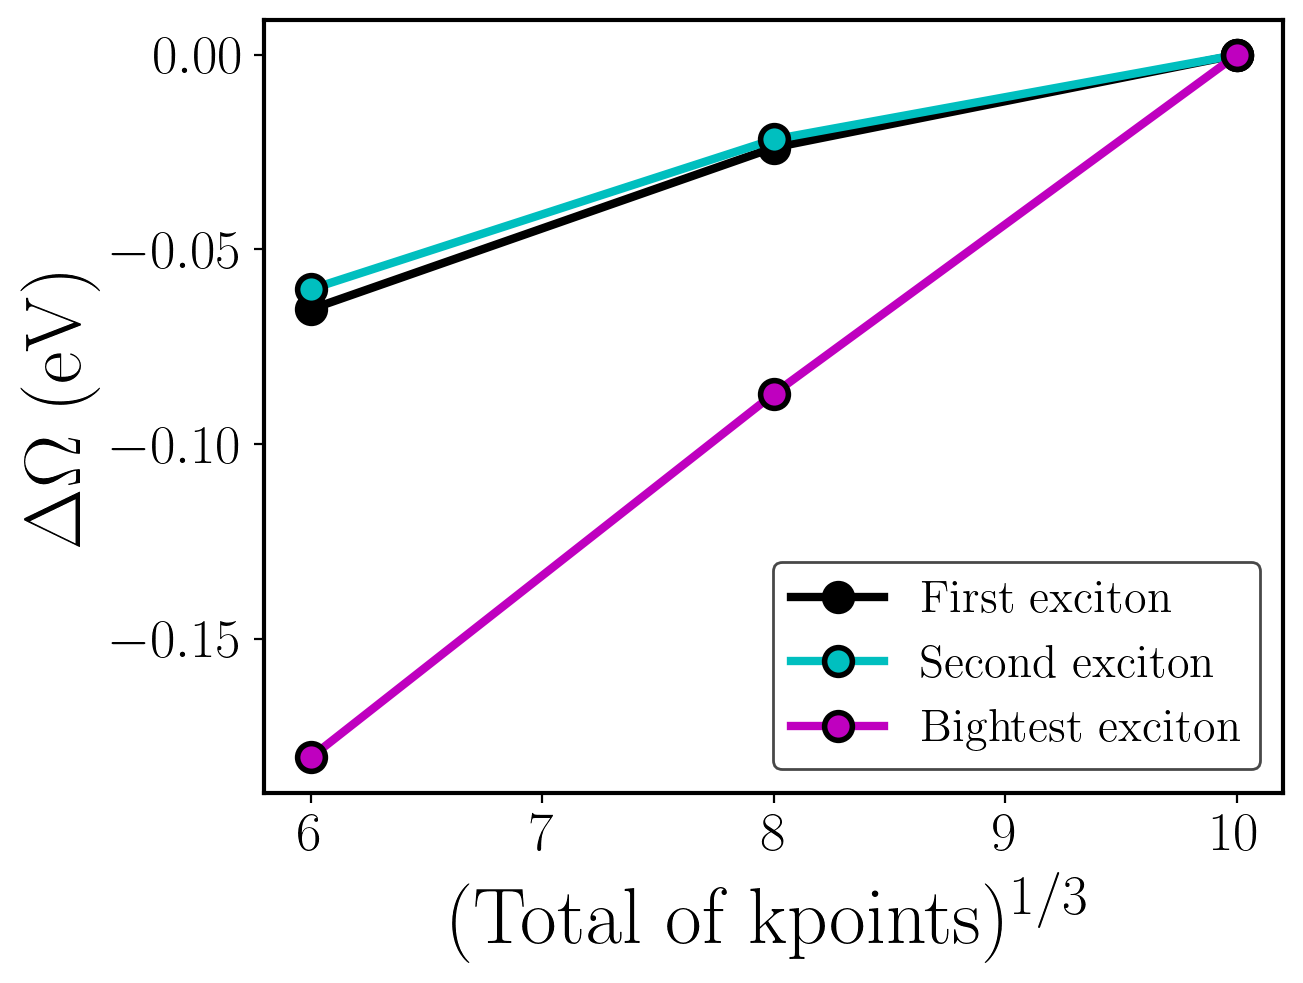

In [9]:
Nk_plot = np.array([6, 8, 10])
first_exciton_energies = [eigvals[0], eigvals_8ktps[0], eigvals_10ktps[0]]
second_exciton_energies = [eigvals[1], eigvals_8ktps[1], eigvals_10ktps[1]]

# exciton with highest dipole moment!
bightest_exciton = np.array([eigvals[np.argmax(dipole_abs)],
                             eigvals_8ktps[np.argmax(dipole_abs_8kpts)],
                             eigvals_10ktps[np.argmax(dipole_abs_10kpts)]])


plt.plot(Nk_plot, first_exciton_energies - first_exciton_energies[-1], 'o-', label='First exciton')
plt.plot(Nk_plot, second_exciton_energies - second_exciton_energies[-1], 'o-', label='Second exciton')
plt.plot(Nk_plot, bightest_exciton - bightest_exciton[-1], 'o-', label='Bightest exciton')

plt.legend()

plt.xlabel(r'(Total of kpoints)$^{1/3}$')
plt.ylabel(r'$\Delta \Omega \ (\mathrm{eV})$')

plt.savefig('Convergence_exciton_energies_vs_fine_kgrid.png')


# Forces in cartesian basis 

- Modulus of those forces
- Separation on forces on cation and cage
  

In [10]:

# forces in cartesian basis 

Forces_cart = []

for i_force in range(50):
    data_file = data_dir+f'Absorption_new/excited_state_forces/forces_cart.out_{i_force+1}-{i_force+1}'
    data = np.loadtxt(data_file, usecols=(2, 3))
    Forces_cart.append(data)

Forces_cart = np.array(Forces_cart)

eigvals = eigvals[:len(Forces_cart[:, 0, 0])]

# data[:, 0] -> RPA diag forces
# data[:, 1] -> RPA diag+offdiag forces


# 8 kpts

Forces_cart_8kpts = []

for i_force in range(150):
    data_file = data_dir+f'Absorption_new_8kpts/excited_state_forces/forces_cart.out_{i_force+1}'
    data = np.loadtxt(data_file, usecols=(2, 3))
    Forces_cart_8kpts.append(data)

Forces_cart_8kpts = np.array(Forces_cart_8kpts)

print(len(Forces_cart_8kpts[:, 0, 0]))
eigvals_8ktps = eigvals_8ktps[:len(Forces_cart_8kpts[:, 0, 0])]


# 10 kpts

Forces_cart_10kpts = []

for i_force in range(150):
    data_file = data_dir+f'Absorption_new_10kpts/excited_state_forces/forces_cart.out_{i_force+1}'
    data = np.loadtxt(data_file, usecols=(2, 3))
    Forces_cart_10kpts.append(data)

Forces_cart_10kpts = np.array(Forces_cart_10kpts)

eigvals_10ktps = eigvals_10ktps[:len(Forces_cart_10kpts[:, 0, 0])]

150


In [11]:
len(Forces_cart[:, 0, 0])

50

In [12]:
# modulus of forces 

mod_Forces = []

for i_force in range(len(Forces_cart)):
    mod_Forces.append([])
    for i_flavor in range(2):
        temp = Forces_cart[i_force, :, i_flavor]
        mod_Forces[-1].append(np.dot(temp, temp))

mod_Forces = np.array(mod_Forces)

print(len(mod_Forces))

# 8 kpts

mod_Forces_8kpts = []

for i_force in range(len(Forces_cart_8kpts)):
    mod_Forces_8kpts.append([])
    for i_flavor in range(2):
        temp = Forces_cart_8kpts[i_force, :, i_flavor]
        mod_Forces_8kpts[-1].append(np.dot(temp, temp))

mod_Forces_8kpts = np.array(mod_Forces_8kpts)

print(len(mod_Forces_8kpts))

# 10 kpts

mod_Forces_10kpts = []

for i_force in range(len(Forces_cart_10kpts)):
    mod_Forces_10kpts.append([])
    for i_flavor in range(2):
        temp = Forces_cart_10kpts[i_force, :, i_flavor]
        mod_Forces_10kpts[-1].append(np.dot(temp, temp))

mod_Forces_10kpts = np.array(mod_Forces_10kpts)

print(len(mod_Forces_10kpts))

50
150
150


Text(0, 0.5, '$|F| (\\mathrm{eV/\\AA})$')

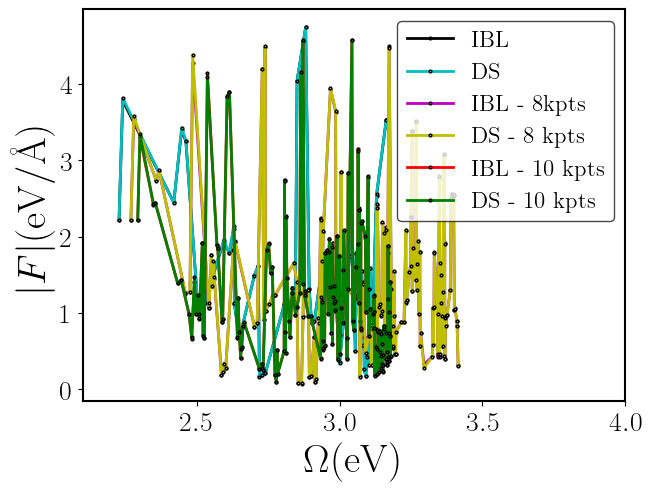

In [13]:
# plot of F vs Omega

plt.figure(dpi=100)

plt.plot(eigvals, mod_Forces[:, 0], '-o', linewidth=2.0, label='IBL', markersize=1)
plt.plot(eigvals, mod_Forces[:, 1], '-o', linewidth=2.0, label='DS' , markersize=1)

plt.plot(eigvals_8ktps, mod_Forces_8kpts[:, 0], '-o', linewidth=2.0, label='IBL - 8kpts', markersize=1)
plt.plot(eigvals_8ktps, mod_Forces_8kpts[:, 1], '-o', linewidth=2.0, label='DS - 8 kpts' , markersize=1)

plt.plot(eigvals_10ktps, mod_Forces_10kpts[:, 0], '-o', linewidth=2.0, label='IBL - 10 kpts', markersize=1)
plt.plot(eigvals_10ktps, mod_Forces_10kpts[:, 1], '-o', linewidth=2.0, label='DS - 10 kpts' , markersize=1)

plt.xlim([2.1, 4])

plt.legend()
plt.xlabel(r'$\Omega (\mathrm{eV})$')
plt.ylabel(r'$|F| (\mathrm{eV/\AA})$')

Text(0, 0.5, '$|F| (\\mathrm{eV/\\AA})$')

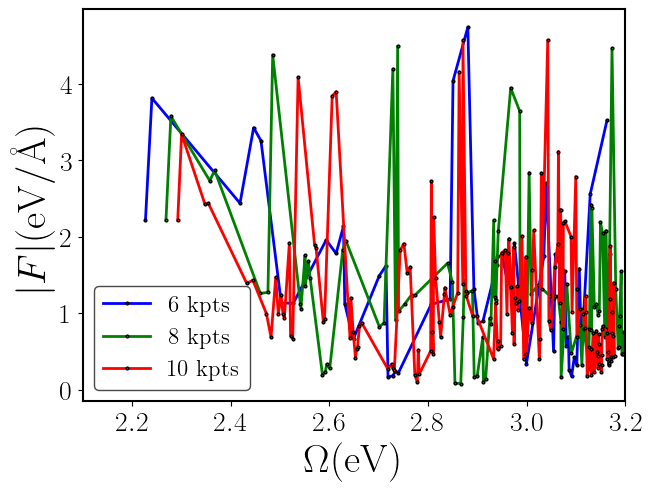

In [14]:
# plot of F vs Omega

plt.figure(dpi=100)

plt.plot(eigvals, mod_Forces[:, 1], '-bo', linewidth=2.0, label='6 kpts' , markersize=1)
plt.plot(eigvals_8ktps, mod_Forces_8kpts[:, 1], '-go', linewidth=2.0, label='8 kpts' , markersize=1)
plt.plot(eigvals_10ktps, mod_Forces_10kpts[:, 1], '-or', linewidth=2.0, label='10 kpts' , markersize=1)

plt.xlim([2.1, 3.2])

plt.legend()
plt.xlabel(r'$\Omega (\mathrm{eV})$')
plt.ylabel(r'$|F| (\mathrm{eV/\AA})$')

In [15]:
# filtering forces on cation and forces on cage atoms

def calculate_mod_forces_cation_IPb(forces):

    # forces is the array of the forces in the order 1x 1y 1z 2x 2y 2z ...
    # the 8 first atoms are from the cation
    # the 9th is Pb and the 3 lasts are I

    F_cation = 0.0
    for i_atom in range(8):
        fx = forces[3*i_atom]
        fy = forces[3*i_atom+1]
        fz = forces[3*i_atom+2]
        F_cation += np.sqrt(fx**2 + fy**2 + fz**2) / 8 

    F_iodine = 0.0
    for i_atom in range(8, 11):
        fx = forces[3*i_atom]
        fy = forces[3*i_atom+1]
        fz = forces[3*i_atom+2]
        F_iodine += np.sqrt(fx**2 + fy**2 + fz**2) / 3

    i_atom = 11
    fx = forces[3*i_atom]
    fy = forces[3*i_atom+1]
    fz = forces[3*i_atom+2]
    F_lead = np.sqrt(fx**2 + fy**2 + fz**2)

    return F_cation, F_iodine, F_lead


F_CATION, F_I, F_PB = [[], []], [[], []], [[], []]

for i_flavor in range(2):
    for i_force in range(len(Forces_cart)):

        F_cation, F_iodine, F_lead = calculate_mod_forces_cation_IPb(Forces_cart[i_force, :, i_flavor])
        F_CATION[i_flavor].append(F_cation)
        F_I[i_flavor].append(F_iodine)
        F_PB[i_flavor].append(F_lead)
        
F_CATION_8kpts, F_I_8kpts, F_PB_8kpts = [[], []], [[], []], [[], []]

for i_flavor in range(2):
    for i_force in range(len(Forces_cart_8kpts)):

        F_cation_8kpts, F_iodine_8kpts, F_lead_8kpts = calculate_mod_forces_cation_IPb(Forces_cart_8kpts[i_force, :, i_flavor])
        F_CATION_8kpts[i_flavor].append(F_cation_8kpts)
        F_I_8kpts[i_flavor].append(F_iodine_8kpts)
        F_PB_8kpts[i_flavor].append(F_lead_8kpts)
        
F_CATION_10kpts, F_I_10kpts, F_PB_10kpts = [[], []], [[], []], [[], []]

for i_flavor in range(2):
    for i_force in range(len(Forces_cart_10kpts)):

        F_cation_10kpts, F_iodine_10kpts, F_lead_10kpts = calculate_mod_forces_cation_IPb(Forces_cart_10kpts[i_force, :, i_flavor])
        F_CATION_10kpts[i_flavor].append(F_cation_10kpts)
        F_I_10kpts[i_flavor].append(F_iodine_10kpts)
        F_PB_10kpts[i_flavor].append(F_lead_10kpts)


In [16]:
i_force, i_flavor = 0, 0

Forces_cart[i_force, :, i_flavor]

array([ 1.52726915e-02, -4.21910594e-05, -1.83249967e-02, -3.60189932e-02,
        1.65413504e-04,  2.65216026e-02,  4.04221272e-03,  6.36947504e-05,
       -5.71900456e-03, -2.86598693e-02, -2.05166457e-02,  7.48784455e-03,
       -2.86513642e-02,  2.05572211e-02,  7.50231477e-03,  3.04179516e-02,
       -4.10948783e-02,  2.19506101e-02,  3.04479015e-02,  4.10532367e-02,
        2.21149103e-02,  5.90198371e-02, -2.43491599e-04,  1.93477862e-02,
       -5.21797435e-01, -1.36855648e-04,  2.53068458e-02,  4.16887361e-01,
       -4.46275071e-04, -8.56053180e-02,  7.99548237e-01,  4.55144589e-04,
       -5.40148293e-01, -7.40255280e-01,  1.74287856e-04,  5.19463068e-01])

Text(0.5, 0.98, '$|F| (\\mathrm{eV/\\AA})$')

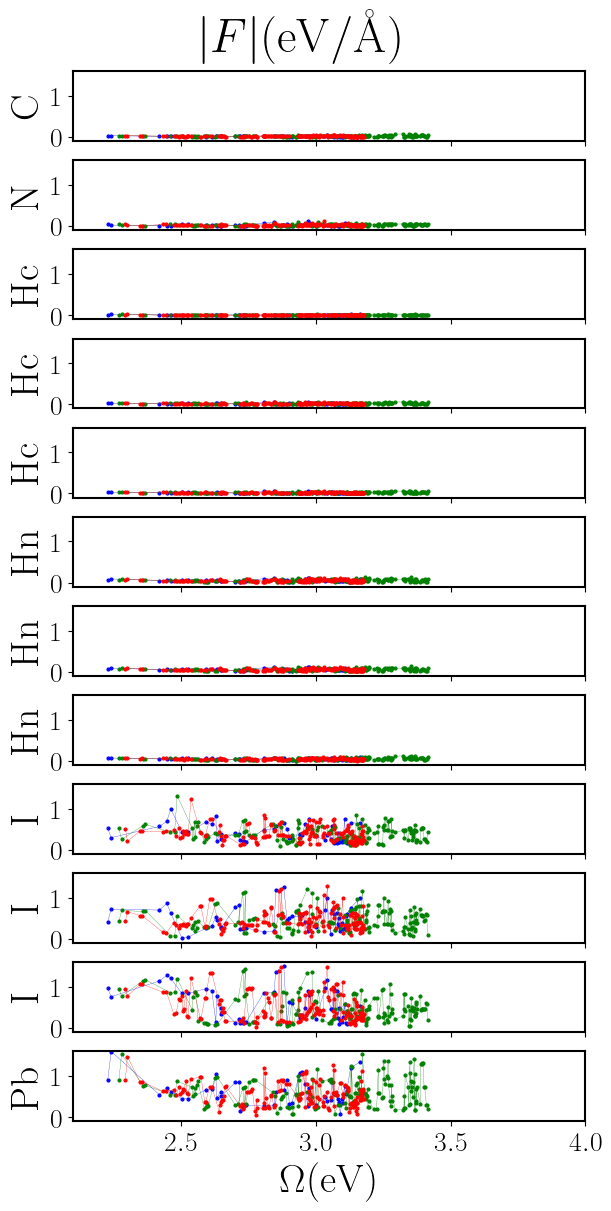

In [17]:
# plotting the modulus of forces for each atom

NAMES = ['C', 'N', 'Hc', 'Hc', 'Hc', 'Hn', 'Hn', 'Hn', 'I', 'I', 'I', 'Pb']

fig, axs = plt.subplots(12, sharex=True, sharey=True, dpi=100, figsize=(6, 12))


for i_atom in range(12):
    plt.sca(axs[i_atom])

    F = []

    for i_force in range(len(Forces_cart)):
        fx = Forces_cart[i_force, :, i_flavor][i_atom*3]
        fy = Forces_cart[i_force, :, i_flavor][i_atom*3+1]
        fz = Forces_cart[i_force, :, i_flavor][i_atom*3+2]
        F.append(np.sqrt(fx**2 + fy**2 + fz**2))
    plt.plot(eigvals, F, linewidth=0.2, marker='o', markersize=1.0, markeredgecolor='b', color='b')
    
    F = []

    for i_force in range(len(Forces_cart_8kpts)):
        fx = Forces_cart_8kpts[i_force, :, i_flavor][i_atom*3]
        fy = Forces_cart_8kpts[i_force, :, i_flavor][i_atom*3+1]
        fz = Forces_cart_8kpts[i_force, :, i_flavor][i_atom*3+2]
        F.append(np.sqrt(fx**2 + fy**2 + fz**2))
    plt.plot(eigvals_8ktps, F, linewidth=0.2, marker='o', markersize=1.0, markeredgecolor='g', color='g')
    
    F = []

    for i_force in range(len(Forces_cart_10kpts)):
        fx = Forces_cart_10kpts[i_force, :, i_flavor][i_atom*3]
        fy = Forces_cart_10kpts[i_force, :, i_flavor][i_atom*3+1]
        fz = Forces_cart_10kpts[i_force, :, i_flavor][i_atom*3+2]
        F.append(np.sqrt(fx**2 + fy**2 + fz**2))
    plt.plot(eigvals_10ktps, F, linewidth=0.2, marker='o', markersize=1.0,  markeredgecolor='r', color='r')
    
    
    plt.ylabel(NAMES[i_atom])
        

plt.xlim([2.1, 4])
plt.ylim([-0.1, 1.6])
plt.xlabel(r'$\Omega (\mathrm{eV})$')
fig.suptitle(r'$|F| (\mathrm{eV/\AA})$')


Text(0.5, 0.98, '$ \\langle |F| \\rangle (\\mathrm{eV/\\AA})$')

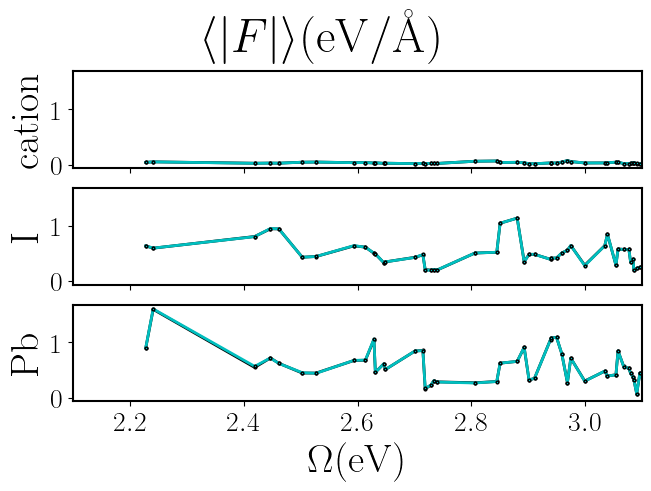

In [18]:

# plot of F vs Omega

fig, axs = plt.subplots(3, sharex=True, sharey=True, dpi=100)

plt.sca(axs[0])
plt.plot(eigvals, F_CATION[0], '-o', linewidth=2.0, markersize=1.0)
plt.plot(eigvals, F_CATION[1], '-o', linewidth=2.0, markersize=1.0)
plt.ylabel('cation')


plt.sca(axs[1])
plt.plot(eigvals, F_I[0], '-o', linewidth=2.0, label='IBL', markersize=1.0)
plt.plot(eigvals, F_I[1], '-o', linewidth=2.0, label='DS' , markersize=1.0)
plt.ylabel('I')
# plt.legend()

plt.sca(axs[2])
plt.plot(eigvals, F_PB[0], '-o', linewidth=2.0, markersize=1.0)
plt.plot(eigvals, F_PB[1], '-o', linewidth=2.0, markersize=1.0)
plt.ylabel('Pb')

plt.xlim([2.1, 3.1])
plt.xlabel(r'$\Omega (\mathrm{eV})$')
fig.suptitle(r'$ \langle |F| \rangle (\mathrm{eV/\AA})$')

# F_CATION[0]

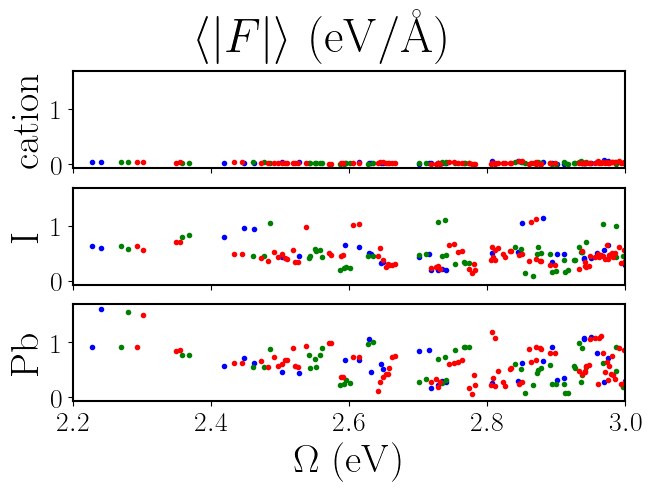

In [19]:

# plot of F vs Omega

fig, axs = plt.subplots(3, sharex=True, sharey=True, dpi=100)

plt.sca(axs[0])
plt.plot(eigvals, F_CATION[1], 'ob', linewidth=2.0, markersize=2.0, markeredgecolor='b')
plt.plot(eigvals_8ktps, F_CATION_8kpts[1], 'og', linewidth=2.0, markersize=2.0, markeredgecolor='g')
plt.plot(eigvals_10ktps, F_CATION_10kpts[1], 'or', linewidth=2.0, markersize=2.0, markeredgecolor='r')
plt.ylabel('cation')


plt.sca(axs[1])
plt.plot(eigvals, F_I[1], 'ob', linewidth=2.0, label='DS' , markersize=2.0, markeredgecolor='b')
plt.plot(eigvals_8ktps, F_I_8kpts[1], 'og', linewidth=2.0, label='DS' , markersize=2.0, markeredgecolor='g')
plt.plot(eigvals_10ktps, F_I_10kpts[1], 'or', linewidth=2.0, label='DS' , markersize=2.0, markeredgecolor='r')

plt.ylabel('I')
# plt.legend()

plt.sca(axs[2])
plt.plot(eigvals, F_PB[1], 'ob', linewidth=2.0, markersize=2.0, markeredgecolor='b')
plt.plot(eigvals_8ktps, F_PB_8kpts[1], 'og', linewidth=2.0, markersize=2.0, markeredgecolor='g')
plt.plot(eigvals_10ktps, F_PB_10kpts[1], 'or', linewidth=2.0, markersize=2.0, markeredgecolor='r')
plt.ylabel('Pb')

plt.xlim([2.2, 3.0])
plt.xlabel(r'$\Omega \ (\mathrm{eV})$')
fig.suptitle(r'$ \langle |F| \rangle \ (\mathrm{eV/\AA})$')

plt.savefig('Excited_state_forces_MAPI_separation_on_I_Pb_MA_several_kgrids.png', dpi=200)

# F_CATION[0]

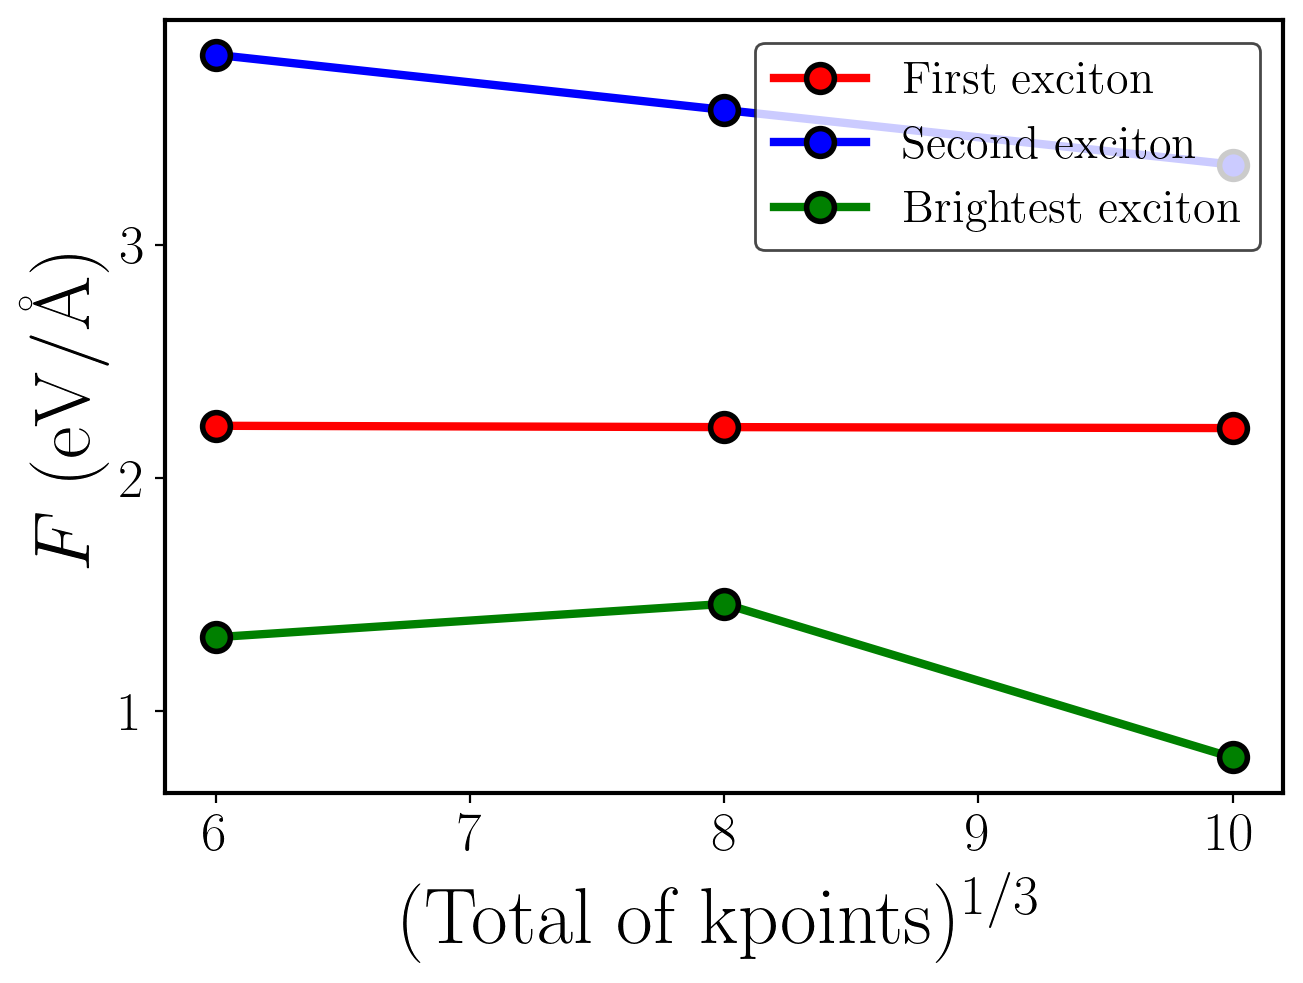

In [20]:
plt.figure()

Nk_plot = np.array([6, 8, 10])
first_exciton_forces = np.array([mod_Forces[0, 1], 
                                 mod_Forces_8kpts[0, 1],
                                 mod_Forces_10kpts[0, 1]])

second_exciton_forces = np.array([mod_Forces[1, 1], 
                                 mod_Forces_8kpts[1, 1],
                                 mod_Forces_10kpts[1, 1]])

brightest_exciton_forces = np.array([mod_Forces[np.argmax(dipole_abs), 1], 
                                 mod_Forces_8kpts[np.argmax(dipole_abs_8kpts), 1],
                                 mod_Forces_10kpts[np.argmax(dipole_abs_10kpts), 1]])


plt.plot(Nk_plot, first_exciton_forces, 'r-o', label='First exciton')
plt.plot(Nk_plot, second_exciton_forces, 'b-o', label='Second exciton')
plt.plot(Nk_plot, brightest_exciton_forces, 'g-o', label='Brightest exciton')


plt.legend()

plt.xlabel(r'(Total of kpoints)$^{1/3}$')
plt.ylabel(r'$F \ (\mathrm{eV/\AA})$')

plt.savefig('Convergence_excited_state_forces_fine_kgrid.png')

# Forces on phonon basis  

In [21]:

Forces_ph = []
Forces_ph_cubic_symm = []


for i_force in range(50):
    data_file = data_dir + f'/Absorption_new/excited_state_forces/forces_phonons_basis.out_{i_force+1}-{i_force+1}'
    data = np.loadtxt(data_file, usecols=(1, 2))
    Forces_ph.append(data)

    data_temp = np.loadtxt(data_file, usecols=(1))

    
Forces_ph = np.array(Forces_ph)


Forces_ph_8kpts = []

for i_force in range(150):
    data_file = data_dir + f'/Absorption_new_8kpts/excited_state_forces/forces_phonons_basis.out_{i_force+1}'
    data = np.loadtxt(data_file, usecols=(1, 2))
    Forces_ph_8kpts.append(data)
    
Forces_ph_8kpts = np.array(Forces_ph_8kpts)



Forces_ph_10kpts = []


for i_force in range(50):
    data_file = data_dir + f'/Absorption_new/excited_state_forces/forces_phonons_basis.out_{i_force+1}-{i_force+1}'
    data = np.loadtxt(data_file, usecols=(1, 2))
    Forces_ph_10kpts.append(data)
    
Forces_ph_10kpts = np.array(Forces_ph_10kpts)

In [22]:
# getting frequencies



def get_freqs(dynmat_out_file):

    freqs_ph = []

    arq = open(dynmat_out_file)
    for line in arq:
        line_split = line.split()
        if len(line_split) > 0:
            if line_split[0] == 'freq':
                freqs_ph.append(float(line_split[7]))
                # print(line_split, len(line_split))
                
    return np.array(freqs_ph)

dynmat_out_file = data_dir+"5-wfn_fi_6kpts/eigvecs"
freqs_ph = get_freqs(dynmat_out_file)

dynmat_out_file = data_dir+"5-wfn_fi_8kpts/eigvecs"
freqs_ph_8kpts = get_freqs(dynmat_out_file)

dynmat_out_file = data_dir+"5-wfn_fi_10kpts/eigvecs"
freqs_ph_10kpts = get_freqs(dynmat_out_file)

print(freqs_ph)

[-2.10000000e-05  8.00000000e-06  3.40000000e-05  2.11918030e+01
  2.85189090e+01  3.00490450e+01  3.26340650e+01  3.43700730e+01
  3.85269410e+01  6.53892190e+01  7.10695370e+01  8.56262960e+01
  8.87595900e+01  9.63914460e+01  1.01399510e+02  1.28936581e+02
  1.34912408e+02  1.41569045e+02  3.11897076e+02  8.75260945e+02
  9.08124410e+02  1.02378138e+03  1.20880183e+03  1.22743426e+03
  1.36566970e+03  1.40337283e+03  1.41260427e+03  1.45745400e+03
  1.52375080e+03  1.53748836e+03  2.94354154e+03  3.03678879e+03
  3.04592749e+03  3.05470172e+03  3.05983000e+03  3.15831625e+03]


In [23]:
def get_eigvecs(eigvecs_file):
    
    arq_eigvecs = open(eigvecs_file)

    displacements = []

    for line in arq_eigvecs:
        line_split = line.split()
        if len(line_split) == 7:
            dx = float(line_split[4])
            dy = float(line_split[5]) 
            dz = float(line_split[6])
            displacements[-1].append(dx)
            displacements[-1].append(dy)
            displacements[-1].append(dz)
        elif len(line_split) == 2:
            if line_split[0] == 'PRIMCOORD':
                displacements.append([])
                
    # converting it to array         
    displacements = np.array(displacements)

    # those eigvecs are not normalized, then we have to do it
    for i_eigvec in range(len(displacements)):
        displacements[i_eigvec] = displacements[i_eigvec] / np.sqrt(np.dot(displacements[i_eigvec], displacements[i_eigvec]))

    # converting it to array         
    return displacements

eigvecs_file = data_dir+"5-wfn_fi_6kpts/dynmat.axsf"
eigvecs_ph = get_eigvecs(eigvecs_file)

eigvecs_file = data_dir+"5-wfn_fi_8kpts/dynmat.axsf"
eigvecs_ph_8kpts = get_eigvecs(eigvecs_file)

eigvecs_file = data_dir+"5-wfn_fi_10kpts/dynmat.axsf"
eigvecs_ph_10kpts = get_eigvecs(eigvecs_file)

In [24]:
print(np.dot(eigvecs_ph_10kpts[-1], eigvecs_ph_10kpts[-1]))
print(np.dot(eigvecs_ph_10kpts[-1], eigvecs_ph_8kpts[-1]))
print(np.dot(eigvecs_ph_10kpts[-1], eigvecs_ph[-1]))

1.0000000000000002
0.999999985002007
0.9999993168244171


1.0000000000000002
0.999999985002007
0.9999993168244171


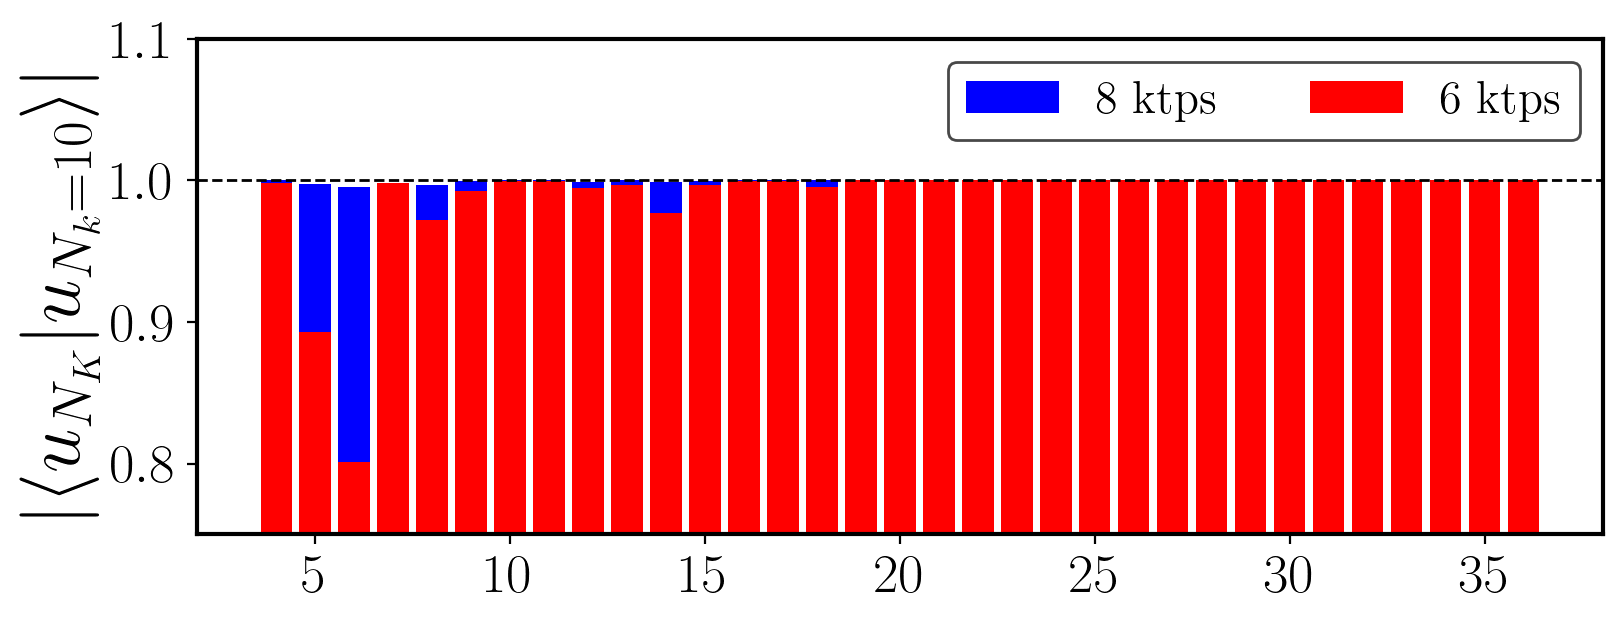

In [25]:
plt.figure(figsize=(8, 3))

plt.axhline(y=1, color='black', linewidth=1, linestyle='--')

for i in range(3, len(freqs_ph)):
    int_prod_6kpts = abs(np.dot(eigvecs_ph[i], eigvecs_ph_10kpts[i]))
    int_prod_8kpts = abs(np.dot(eigvecs_ph_8kpts[i], eigvecs_ph_10kpts[i]))
  
    if int_prod_6kpts < int_prod_8kpts:
        plt.bar(i+1, int_prod_8kpts, color='b')  
        plt.bar(i+1, int_prod_6kpts, color='r')
    else:
        plt.bar(i+1, int_prod_6kpts, color='r')
        plt.bar(i+1, int_prod_8kpts, color='r')


print(np.dot(eigvecs_ph_10kpts[-1], eigvecs_ph_10kpts[-1]))
print(np.dot(eigvecs_ph_10kpts[-1], eigvecs_ph_8kpts[-1]))
print(np.dot(eigvecs_ph_10kpts[-1], eigvecs_ph[-1]))

plt.bar(i+1, 0, color = 'blue', label='8 ktps')
plt.bar(i+1, 0, color = 'red', label='6 ktps')


plt.legend(ncol=2)

plt.ylim([0.75, 1.1])

plt.ylabel(r'$|\langle u_{N_K} | u_{N_k = 10} \rangle |$')

plt.savefig('Convergence_ph_eigvecs_vs_kgrid.png')

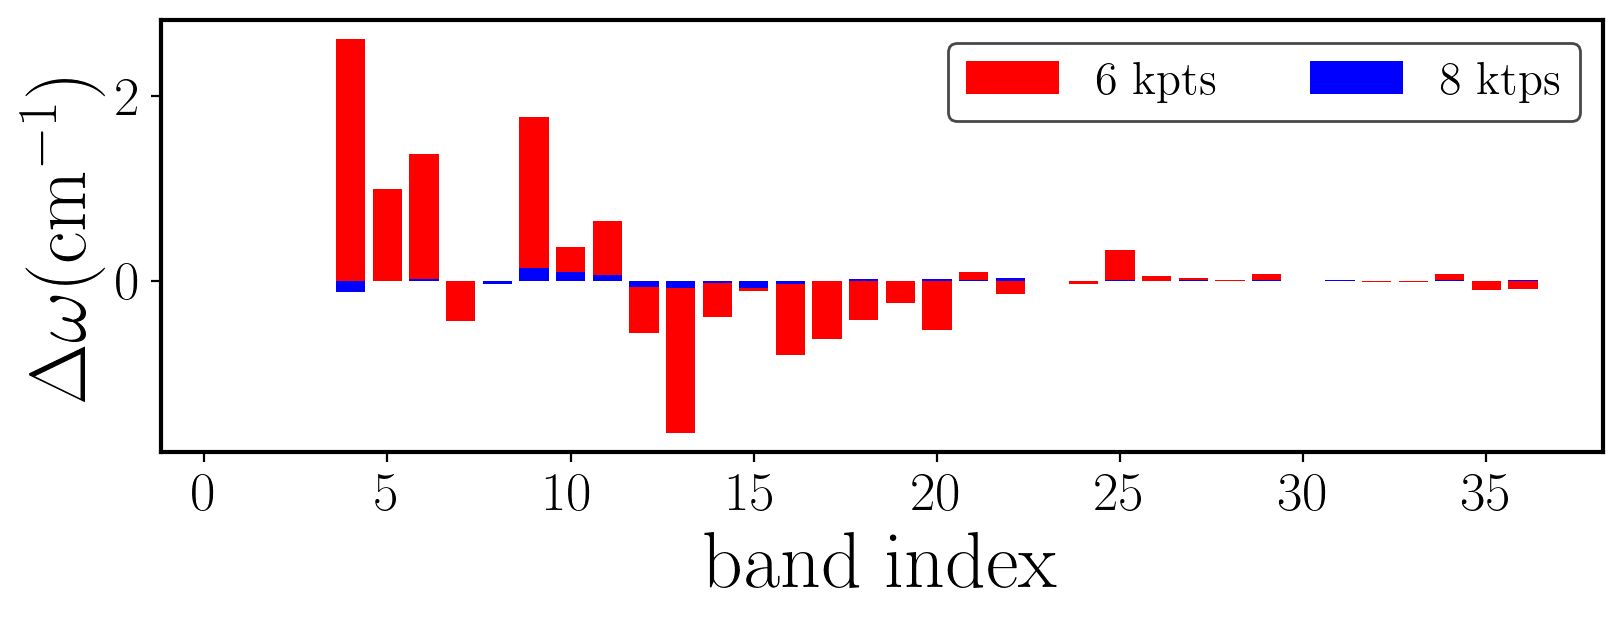

In [26]:
plt.figure(figsize=(8, 3))

for i in range(len(freqs_ph)):
    plt.bar(i+1, (freqs_ph - freqs_ph_10kpts)[i], color = 'red')
plt.bar(i+1, (freqs_ph - freqs_ph_10kpts)[i], color = 'red', label='6 kpts')
    
for i in range(len(freqs_ph)):
    plt.bar(i+1, (freqs_ph_8kpts - freqs_ph_10kpts)[i], color = 'blue')
plt.bar(i+1, (freqs_ph_8kpts - freqs_ph_10kpts)[i], color = 'blue', label='8 ktps')

plt.legend(ncol=2)

plt.ylabel(r'$\Delta \omega (\mathrm{cm^{-1}})$')
plt.xlabel('band index')

plt.savefig('Convergence_ph_eigvals_vs_kgrid.png')

In [27]:
print(np.max(abs(Forces_ph)))
print(np.shape(Forces_ph))


1.2845789187924899
(50, 36, 2)


([<matplotlib.axis.YTick at 0x140fbcbb0>,
 [Text(0, 0, '0'),
  Text(0, 2, '0'),
  Text(0, 4, '0'),
  Text(0, 6, '21'),
  Text(0, 8, '28'),
  Text(0, 10, '30'),
  Text(0, 12, '32'),
  Text(0, 14, '34'),
  Text(0, 16, '38'),
  Text(0, 18, '65'),
  Text(0, 20, '71'),
  Text(0, 22, '85'),
  Text(0, 24, '88'),
  Text(0, 26, '96'),
  Text(0, 28, '101'),
  Text(0, 30, '128'),
  Text(0, 32, '134'),
  Text(0, 34, '141'),
  Text(0, 36, '311'),
  Text(0, 38, '875'),
  Text(0, 40, '908'),
  Text(0, 42, '1023'),
  Text(0, 44, '1208'),
  Text(0, 46, '1227'),
  Text(0, 48, '1365'),
  Text(0, 50, '1403'),
  Text(0, 52, '1412'),
  Text(0, 54, '1457'),
  Text(0, 56, '1523'),
  Text(0, 58, '1537'),
  Text(0, 60, '2943'),
  Text(0, 62, '3036'),
  Text(0, 64, '3045'),
  Text(0, 66, '3054'),
  Text(0, 68, '3059'),
  Text(0, 70, '3158')])

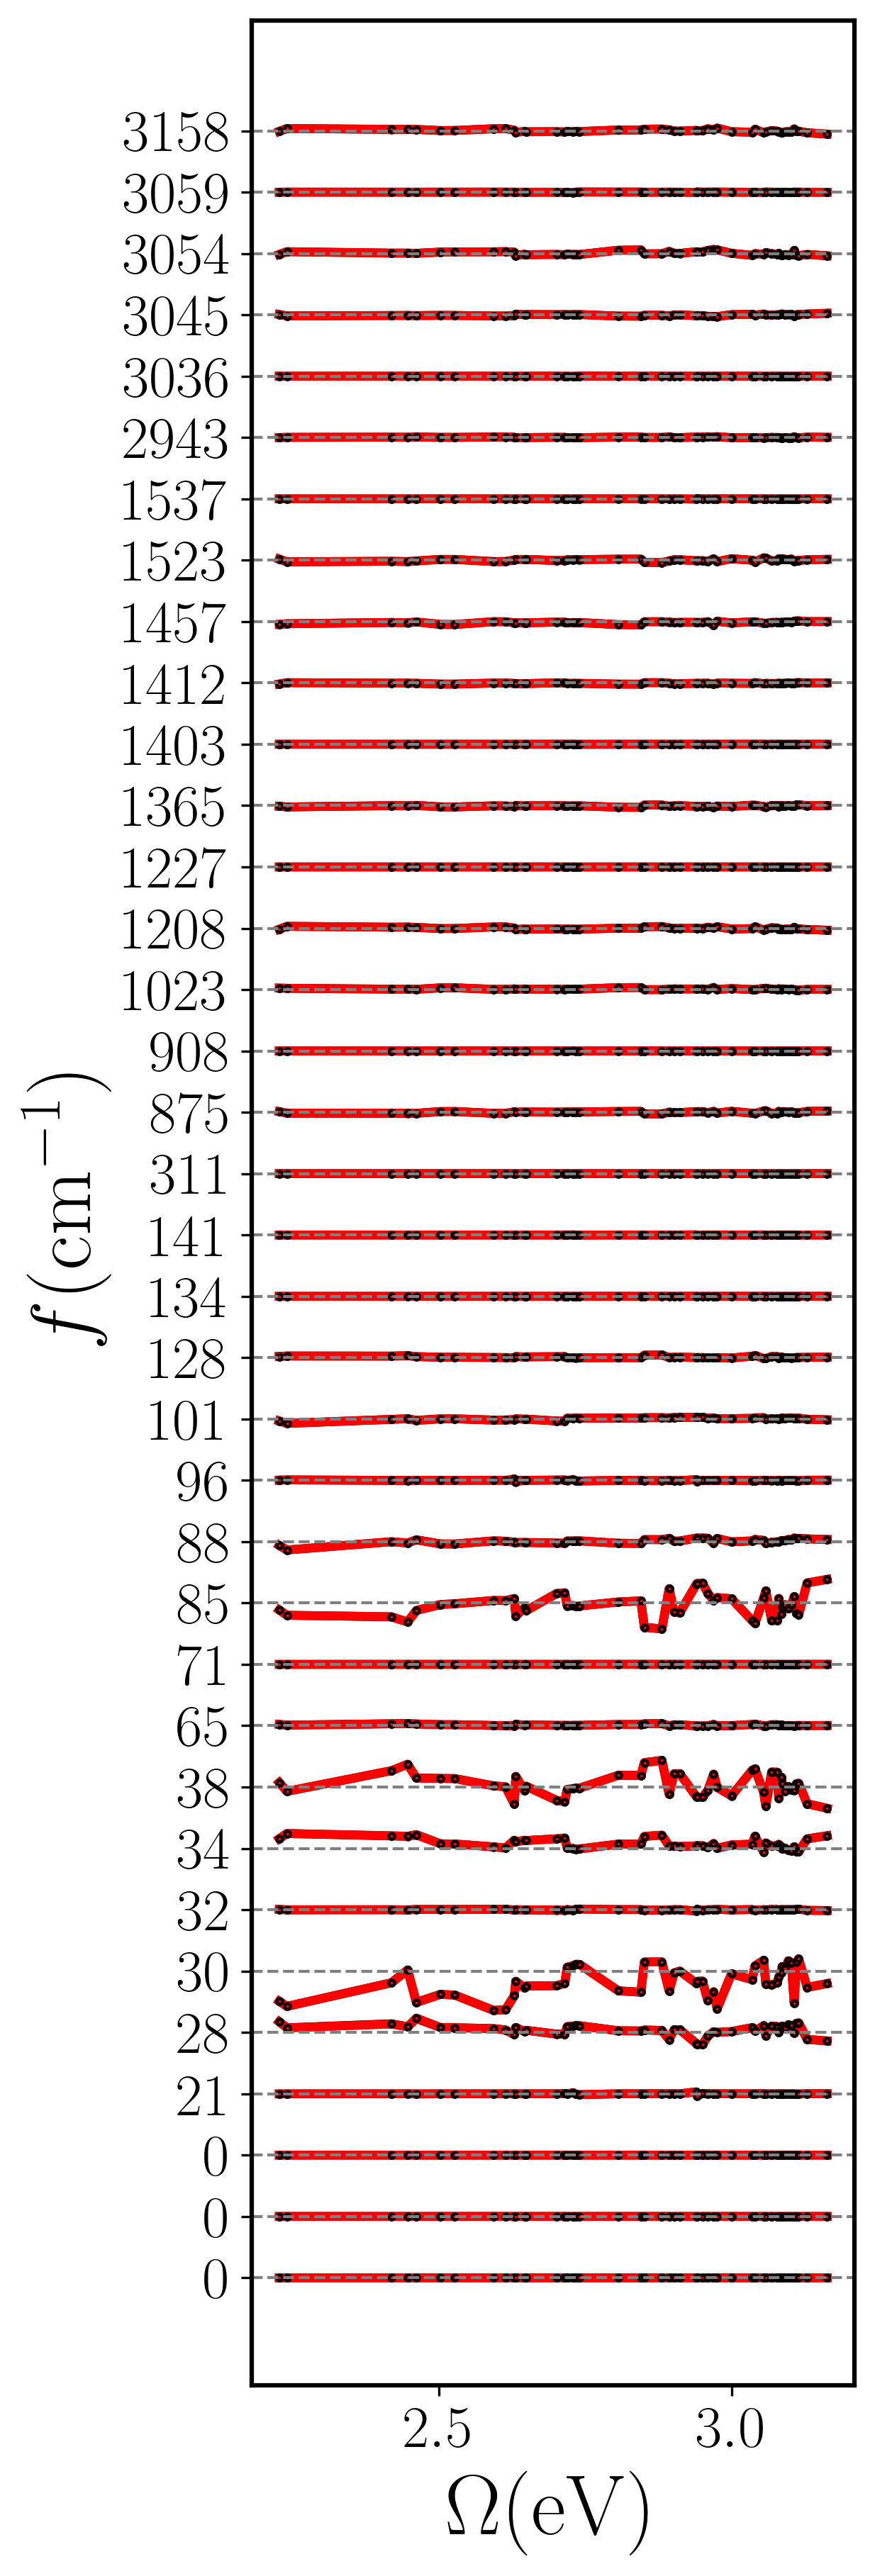

In [28]:
plt.figure(dpi=300, figsize=(4, 12))

MEAN_FORCE = []
STD_FORCE = []
MAX_FORCE, MIN_FORCE = [], []


for imode in range(36):

    plt.plot(eigvals, 2*imode+Forces_ph[:,imode,0], 'k-o', markersize=1.0)
    plt.plot(eigvals, 2*imode+Forces_ph[:,imode,1], 'r-o', markersize=1.0)

    plt.axhline(y = 2*imode, color = 'gray', linestyle = '--', linewidth=1.0)

    MEAN_FORCE.append(np.mean(abs(Forces_ph[:,imode,1])))
    STD_FORCE.append(np.std(abs(Forces_ph[:,imode,1])))
    MAX_FORCE.append(np.max(abs(Forces_ph[:,imode,1])))
    MIN_FORCE.append(np.min(abs(Forces_ph[:,imode,1])))


MEAN_FORCE = np.array(MEAN_FORCE)
STD_FORCE  = np.array(STD_FORCE)
MAX_FORCE  = np.array(MAX_FORCE)
MIN_FORCE  = np.array(MIN_FORCE)
    
plt.xlabel(r'$\Omega (\mathrm{eV})$')
plt.ylabel(r'$f (\mathrm{cm^{-1}})$')

YTICKS = []
for imode in range(36):
    YTICKS.append(int(freqs_ph[imode]))

plt.yticks([2*imode for imode in range(36)], YTICKS)


In [29]:
print(np.shape(Forces_ph[:,:,0]))
print(np.shape(np.transpose(Forces_ph[:,:,0])))
print([iO for iO in range(0, len(eigvals), int(len(eigvals)/5))])


(50, 36)
(36, 50)
[0, 10, 20, 30, 40]


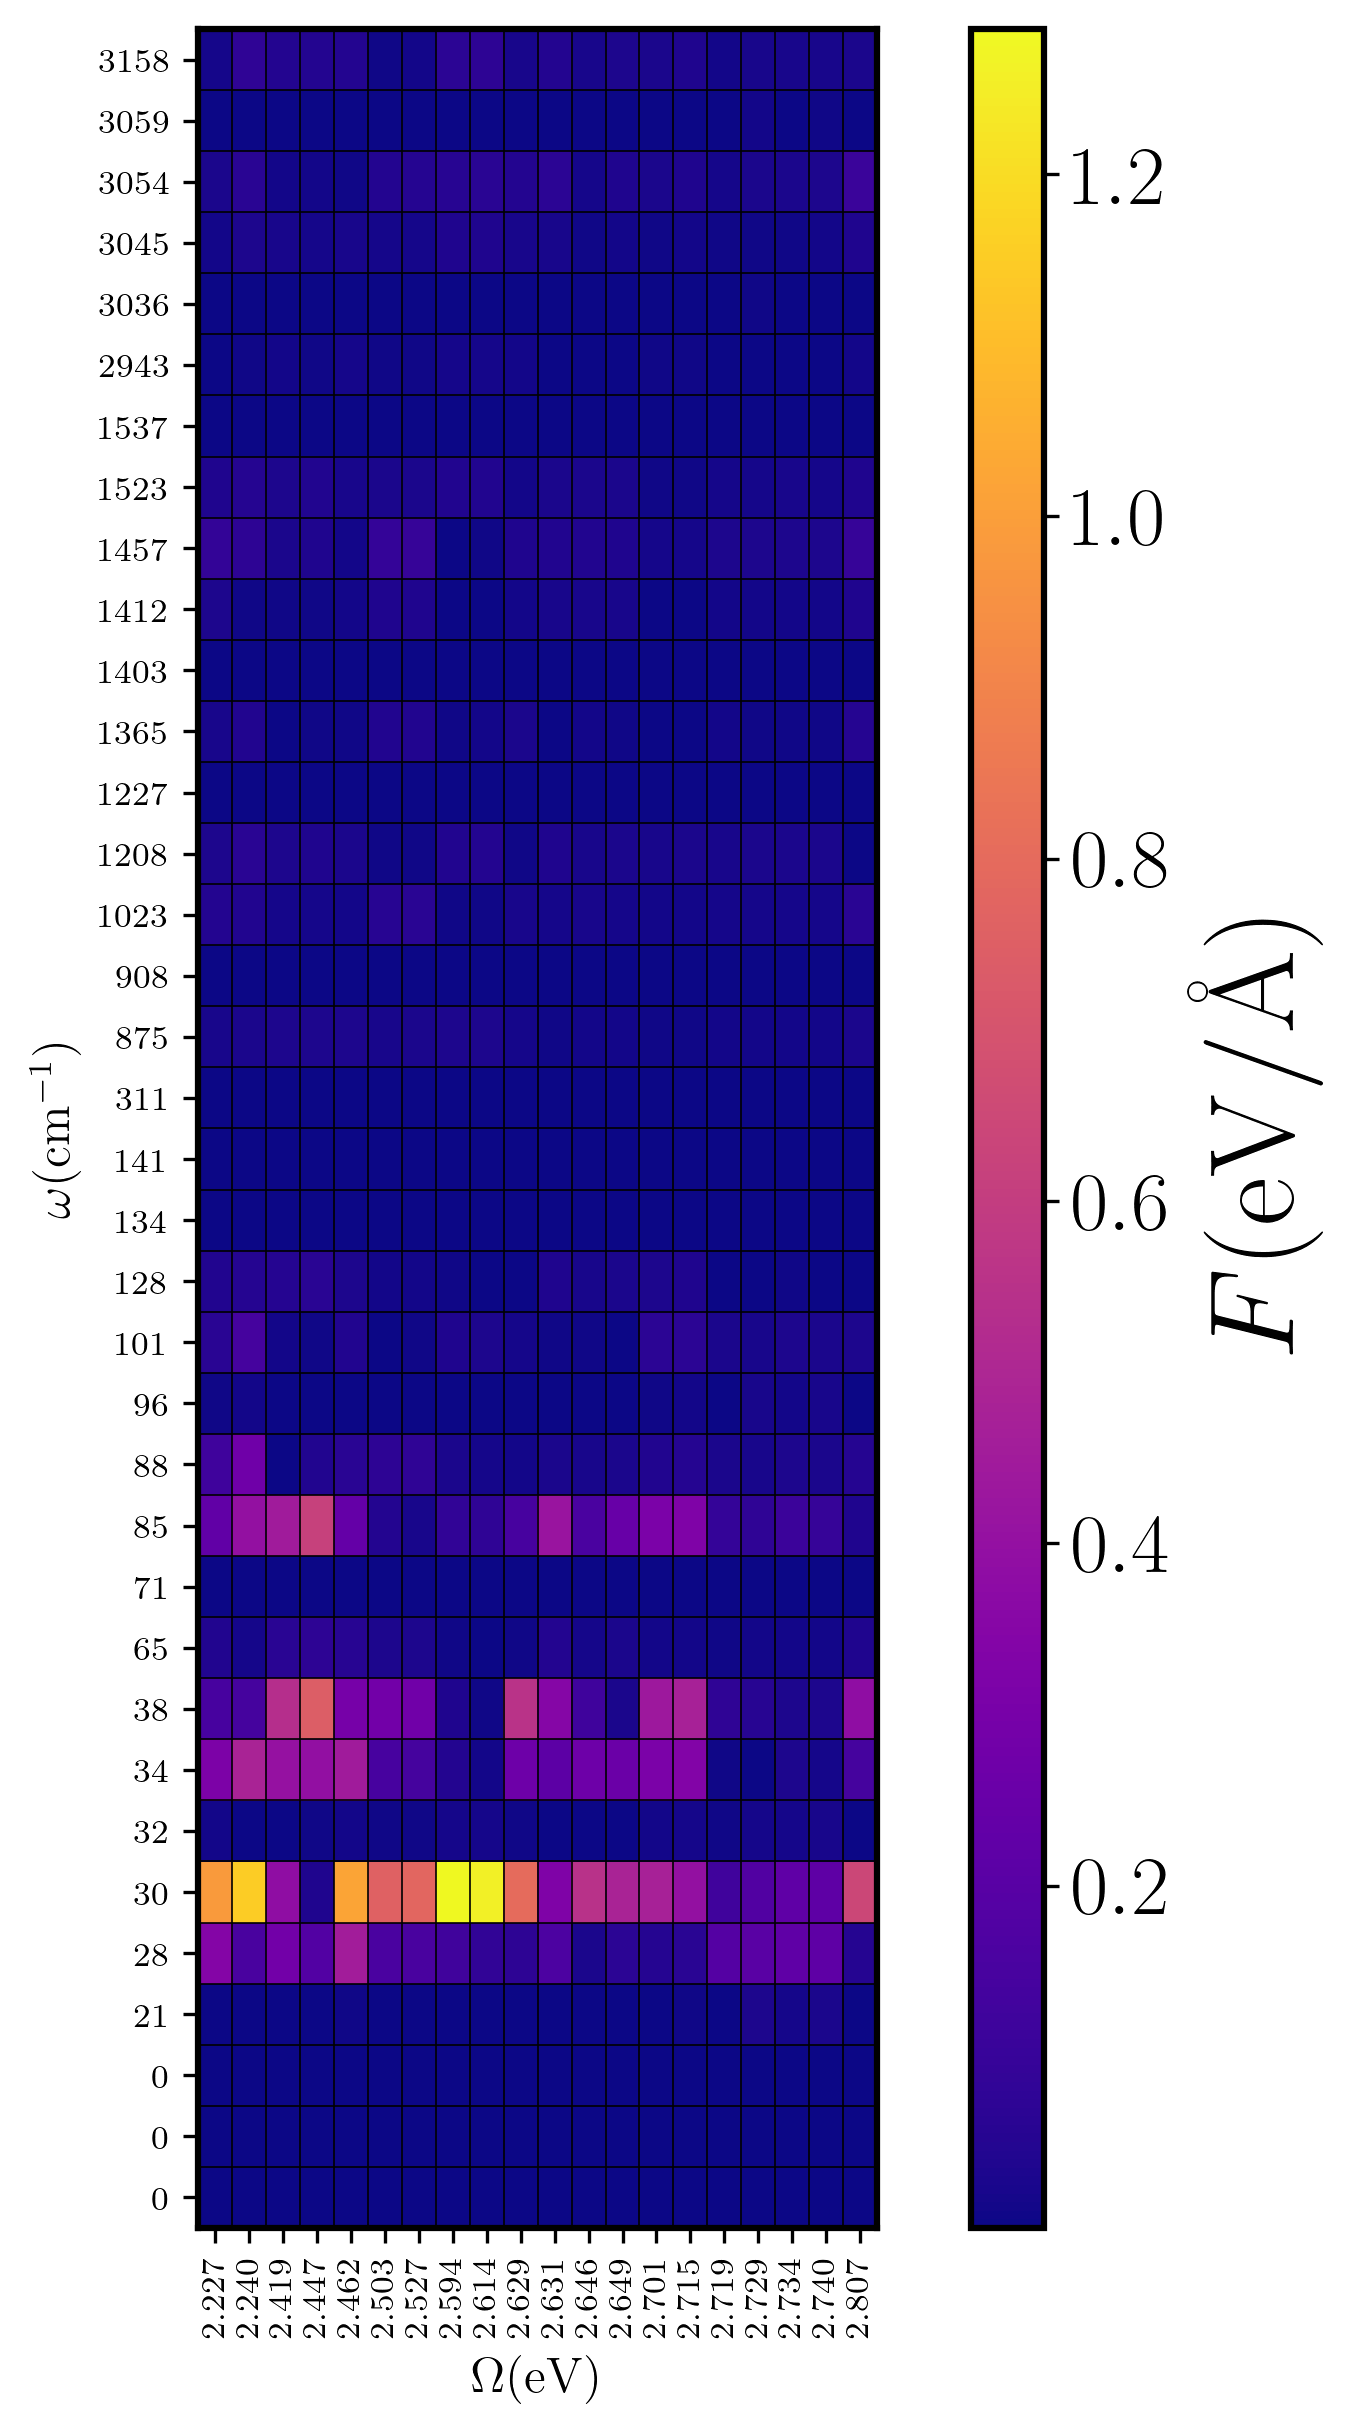

In [30]:
excitons_to_show = 20 # must be < 999
Vals_to_show = 20

plt.figure(dpi=300, figsize=(12,8))

# plt.matshow(abs(Forces_ph[:100, :, 0]))
im = plt.imshow(abs(np.transpose(Forces_ph[:excitons_to_show, :, 0])), origin="lower", aspect=1.8, cmap='plasma')
cb = plt.colorbar(im, aspect=30, pad=0.03, label=r'$F(\mathrm{eV/\AA})$')



plt.yticks([imode for imode in range(len(YTICKS))], YTICKS, fontsize=8)


Omega_min = eigvals[0]
Omega_max = eigvals[excitons_to_show - 1]
Delta_Omega = (Omega_max - Omega_min) / Vals_to_show

XTICKS_VALS = [iO for iO in range(0, excitons_to_show, int(excitons_to_show/Vals_to_show))]
XTICKS = ["%.3f" % eigvals[i_omega] for i_omega in range(len(XTICKS_VALS))]

plt.xticks(XTICKS_VALS, XTICKS, rotation=90, fontsize=8)
# plt.xticks([])
# plt.yticks([])

for i_exc in range(excitons_to_show):
    plt.axvline(x = i_exc + 0.5, color='black', linewidth=0.4)
    
for i_freq in range(36):
    plt.axhline(y = i_freq + 0.5, color='black', linewidth=0.4)
    
    

    
plt.xlabel(r'$\Omega (\mathrm{eV})$', fontsize=12)
plt.ylabel(r'$\omega (\mathrm{cm^{-1}})$', fontsize=12)

print(' ');


In [39]:
np.shape(Forces_ph)
excitons_to_show = 6 # must be < 999

# test
relevant_forces_indexes = (1,2,3,4,10)
Forces_ph[0, relevant_forces_indexes, 0]


relevant_forces_indexes = []
Fmax = np.max(Forces_ph[:,:,0])

for i_ph in range(len(freqs_ph)):
    Fmax_for_i_ph = np.max(Forces_ph_10kpts[:,i_ph,1])
    if Fmax_for_i_ph > Fmax/100:
        print(i_ph+1, Fmax_for_i_ph, freqs_ph[i_ph])
        relevant_forces_indexes.append(i_ph)
        
YTICKS_new = [YTICKS[i_ph] for i_ph in relevant_forces_indexes]

4 0.062008741268029584 21.191803
5 0.4709373480811849 28.518909
6 0.39666418361167555 30.049045
7 0.021240448879035107 32.634065
8 0.48576382483417224 34.370073
9 0.8693601975334779 38.526941
10 0.07144418717372575 65.389219
12 0.7699670997174224 85.626296
13 0.12200586141663772 88.75959
14 0.05130749245038274 96.391446
15 0.05875119358844744 101.39951
16 0.08962659455426336 128.936581
20 0.05455125370808905 875.260945
22 0.07148475614476213 1023.781377
23 0.06431916773905355 1208.801826
25 0.026880335688909837 1365.669698
27 0.011884179118217751 1412.604272
28 0.02426212752592635 1457.453997
29 0.0795908843927706 1523.750804
31 0.027977755221195832 2943.54154
33 0.05205552138136385 3045.927485
34 0.13420158662164214 3054.701721
35 0.010363188930440505 3059.830004
36 0.09098263158761037 3158.316246


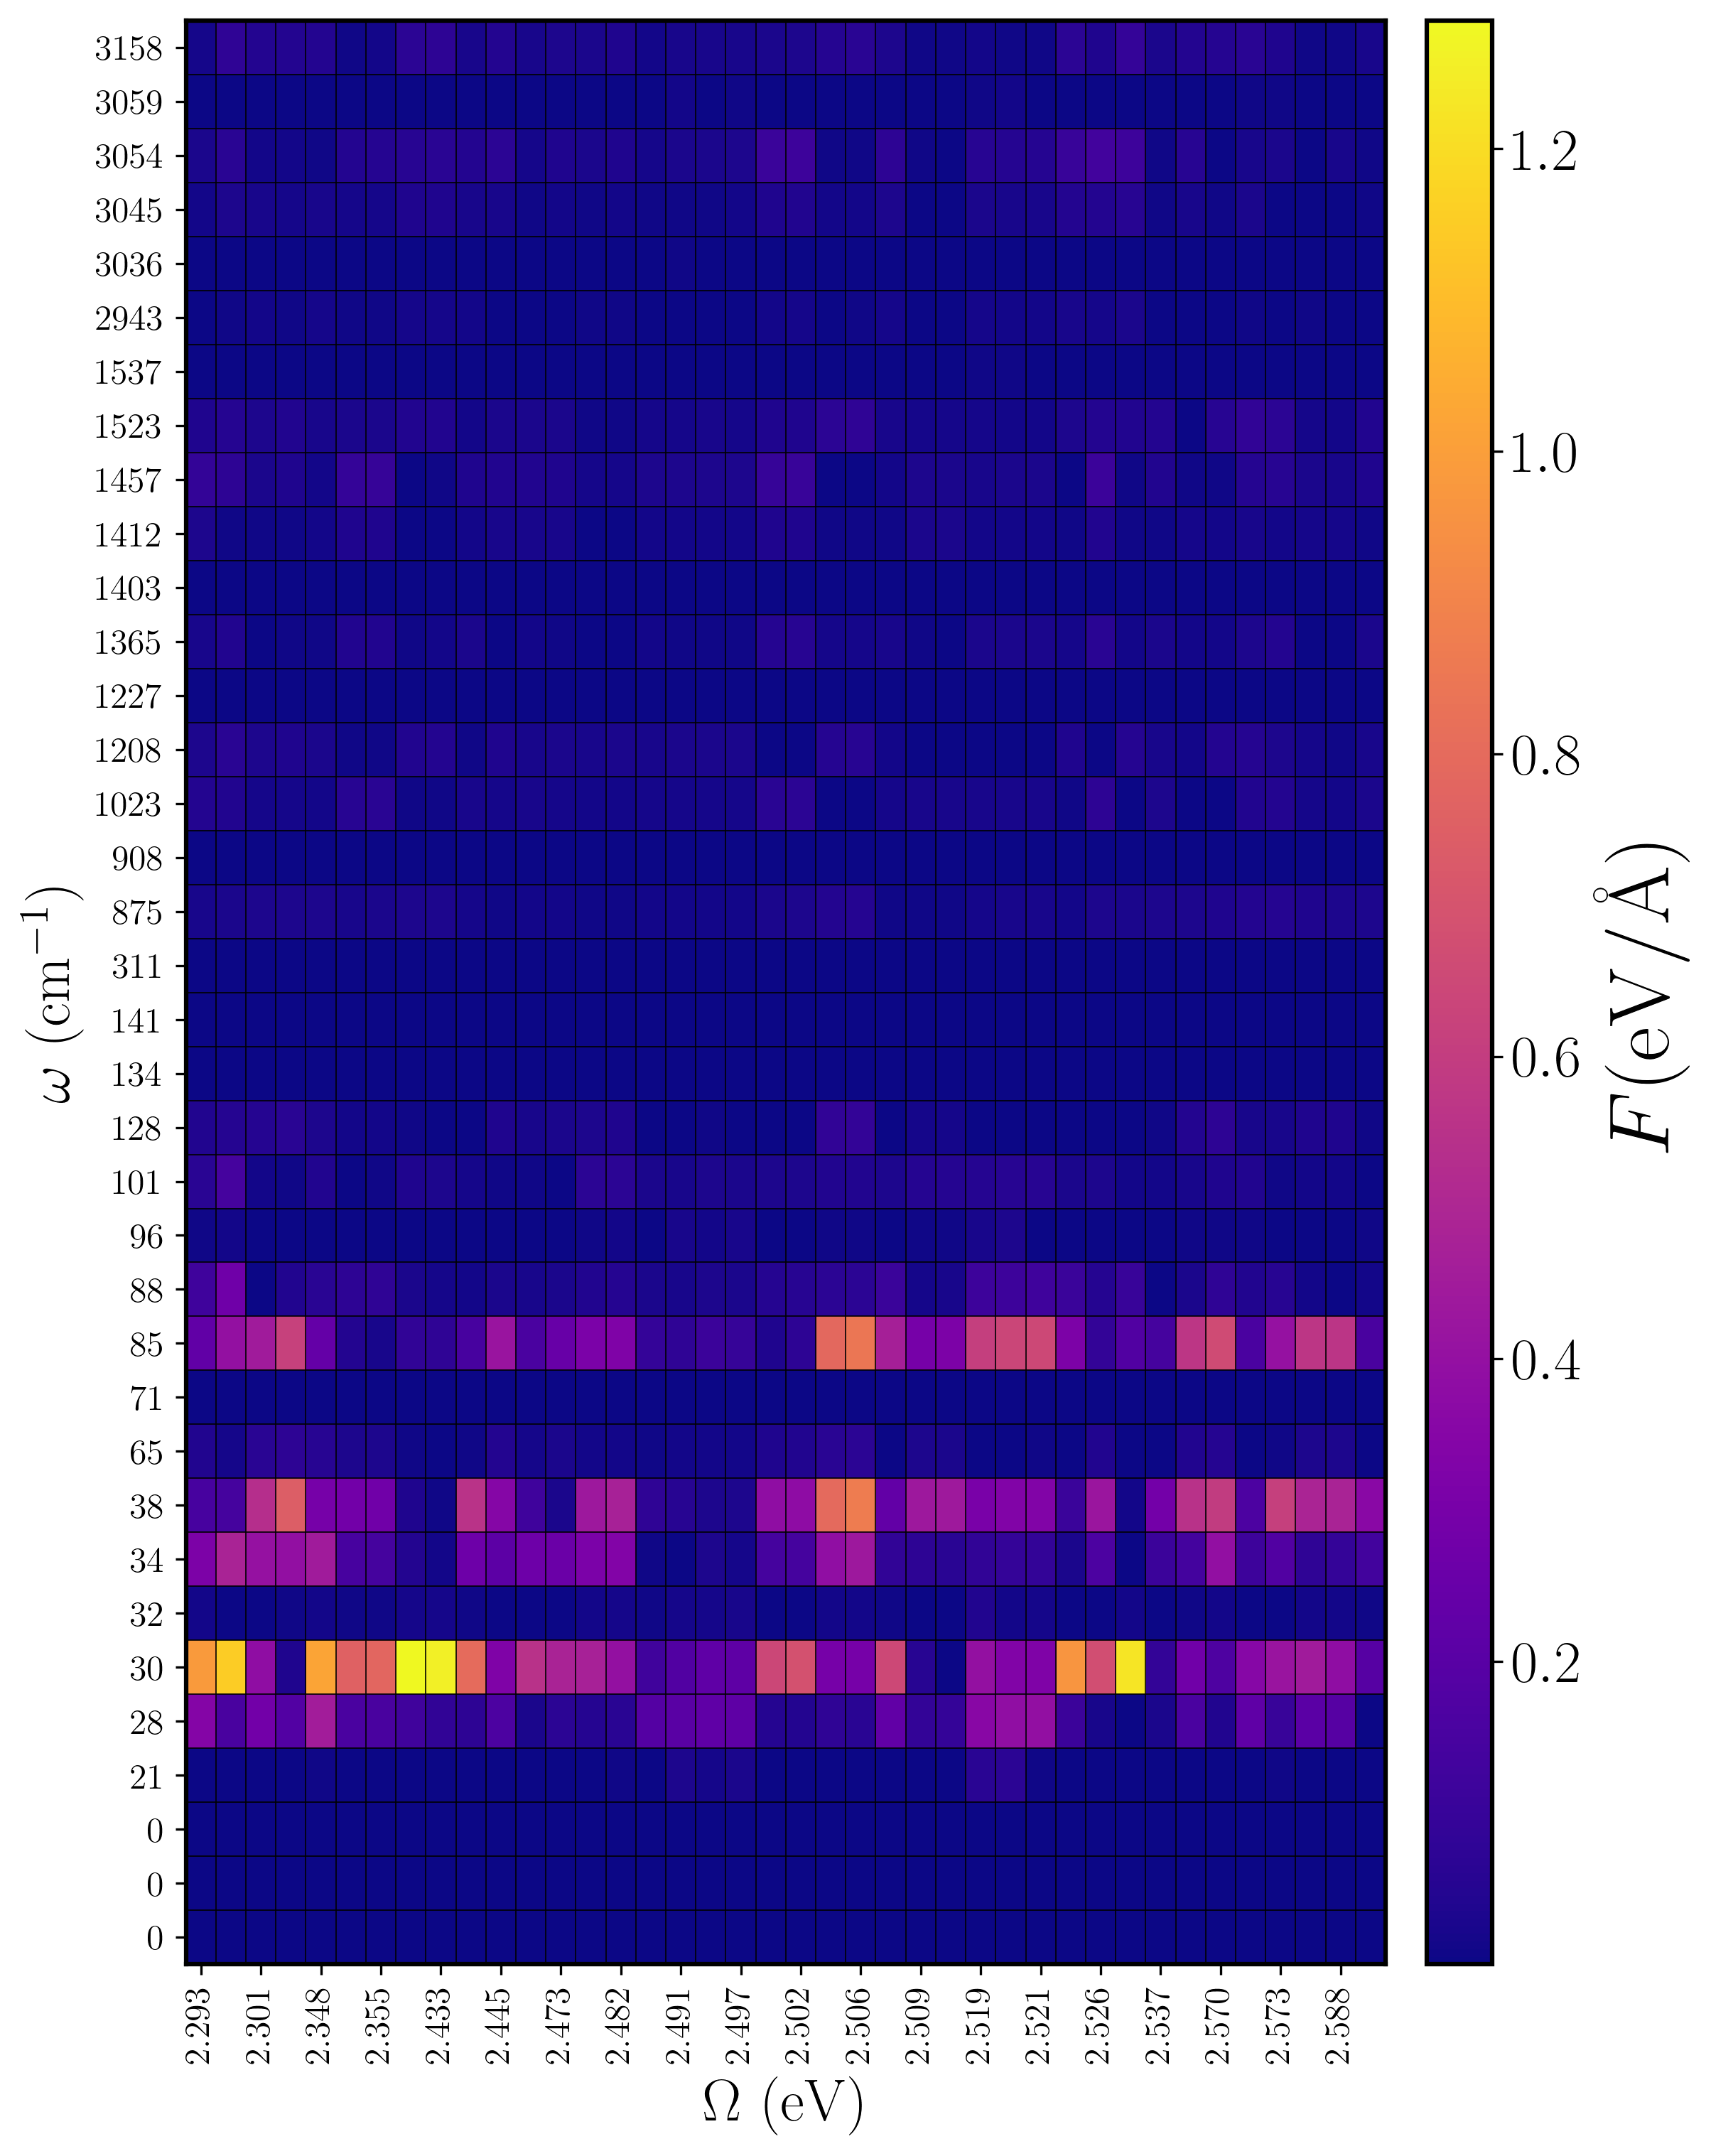

In [ ]:
excitons_to_show = 40 # must be < 999
Vals_to_show = 20

plt.figure(dpi=300, figsize=(8,10))

# plt.matshow(abs(Forces_ph[:100, :, 0]))
im = plt.imshow(abs(np.transpose(Forces_ph_10kpts[:excitons_to_show, :, 0])), origin="lower", aspect=1.8, cmap='plasma')
cb = plt.colorbar(im, aspect=30, pad=0.03, label=r'$F(\mathrm{eV/\AA})$')



plt.yticks([imode for imode in range(len(YTICKS))], YTICKS, fontsize=8)

Omega_min = eigvals_10ktps[0]
Omega_max = eigvals_10ktps[excitons_to_show - 1]
Delta_Omega = (Omega_max - Omega_min) / Vals_to_show

XTICKS_VALS = [iO for iO in range(0, excitons_to_show, int(excitons_to_show/Vals_to_show))]
XTICKS = ["%.3f" % eigvals_10ktps[i_omega] for i_omega in range(len(XTICKS_VALS))]

plt.xticks(XTICKS_VALS, XTICKS, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
# plt.xticks([])
# plt.yticks([])

for i_exc in range(excitons_to_show):
    plt.axvline(x = i_exc + 0.5, color='black', linewidth=0.4)
    
for i_freq in range(36):
    plt.axhline(y = i_freq + 0.5, color='black', linewidth=0.4)
    
    

    
plt.xlabel(r'$\Omega \ (\mathrm{eV})$', fontsize=20)
plt.ylabel(r'$\omega \ (\mathrm{cm^{-1}})$', fontsize=20)

# print(' ');

plt.savefig('Exciton_ph_coupling_cubic_MAPI.png', dpi=200)

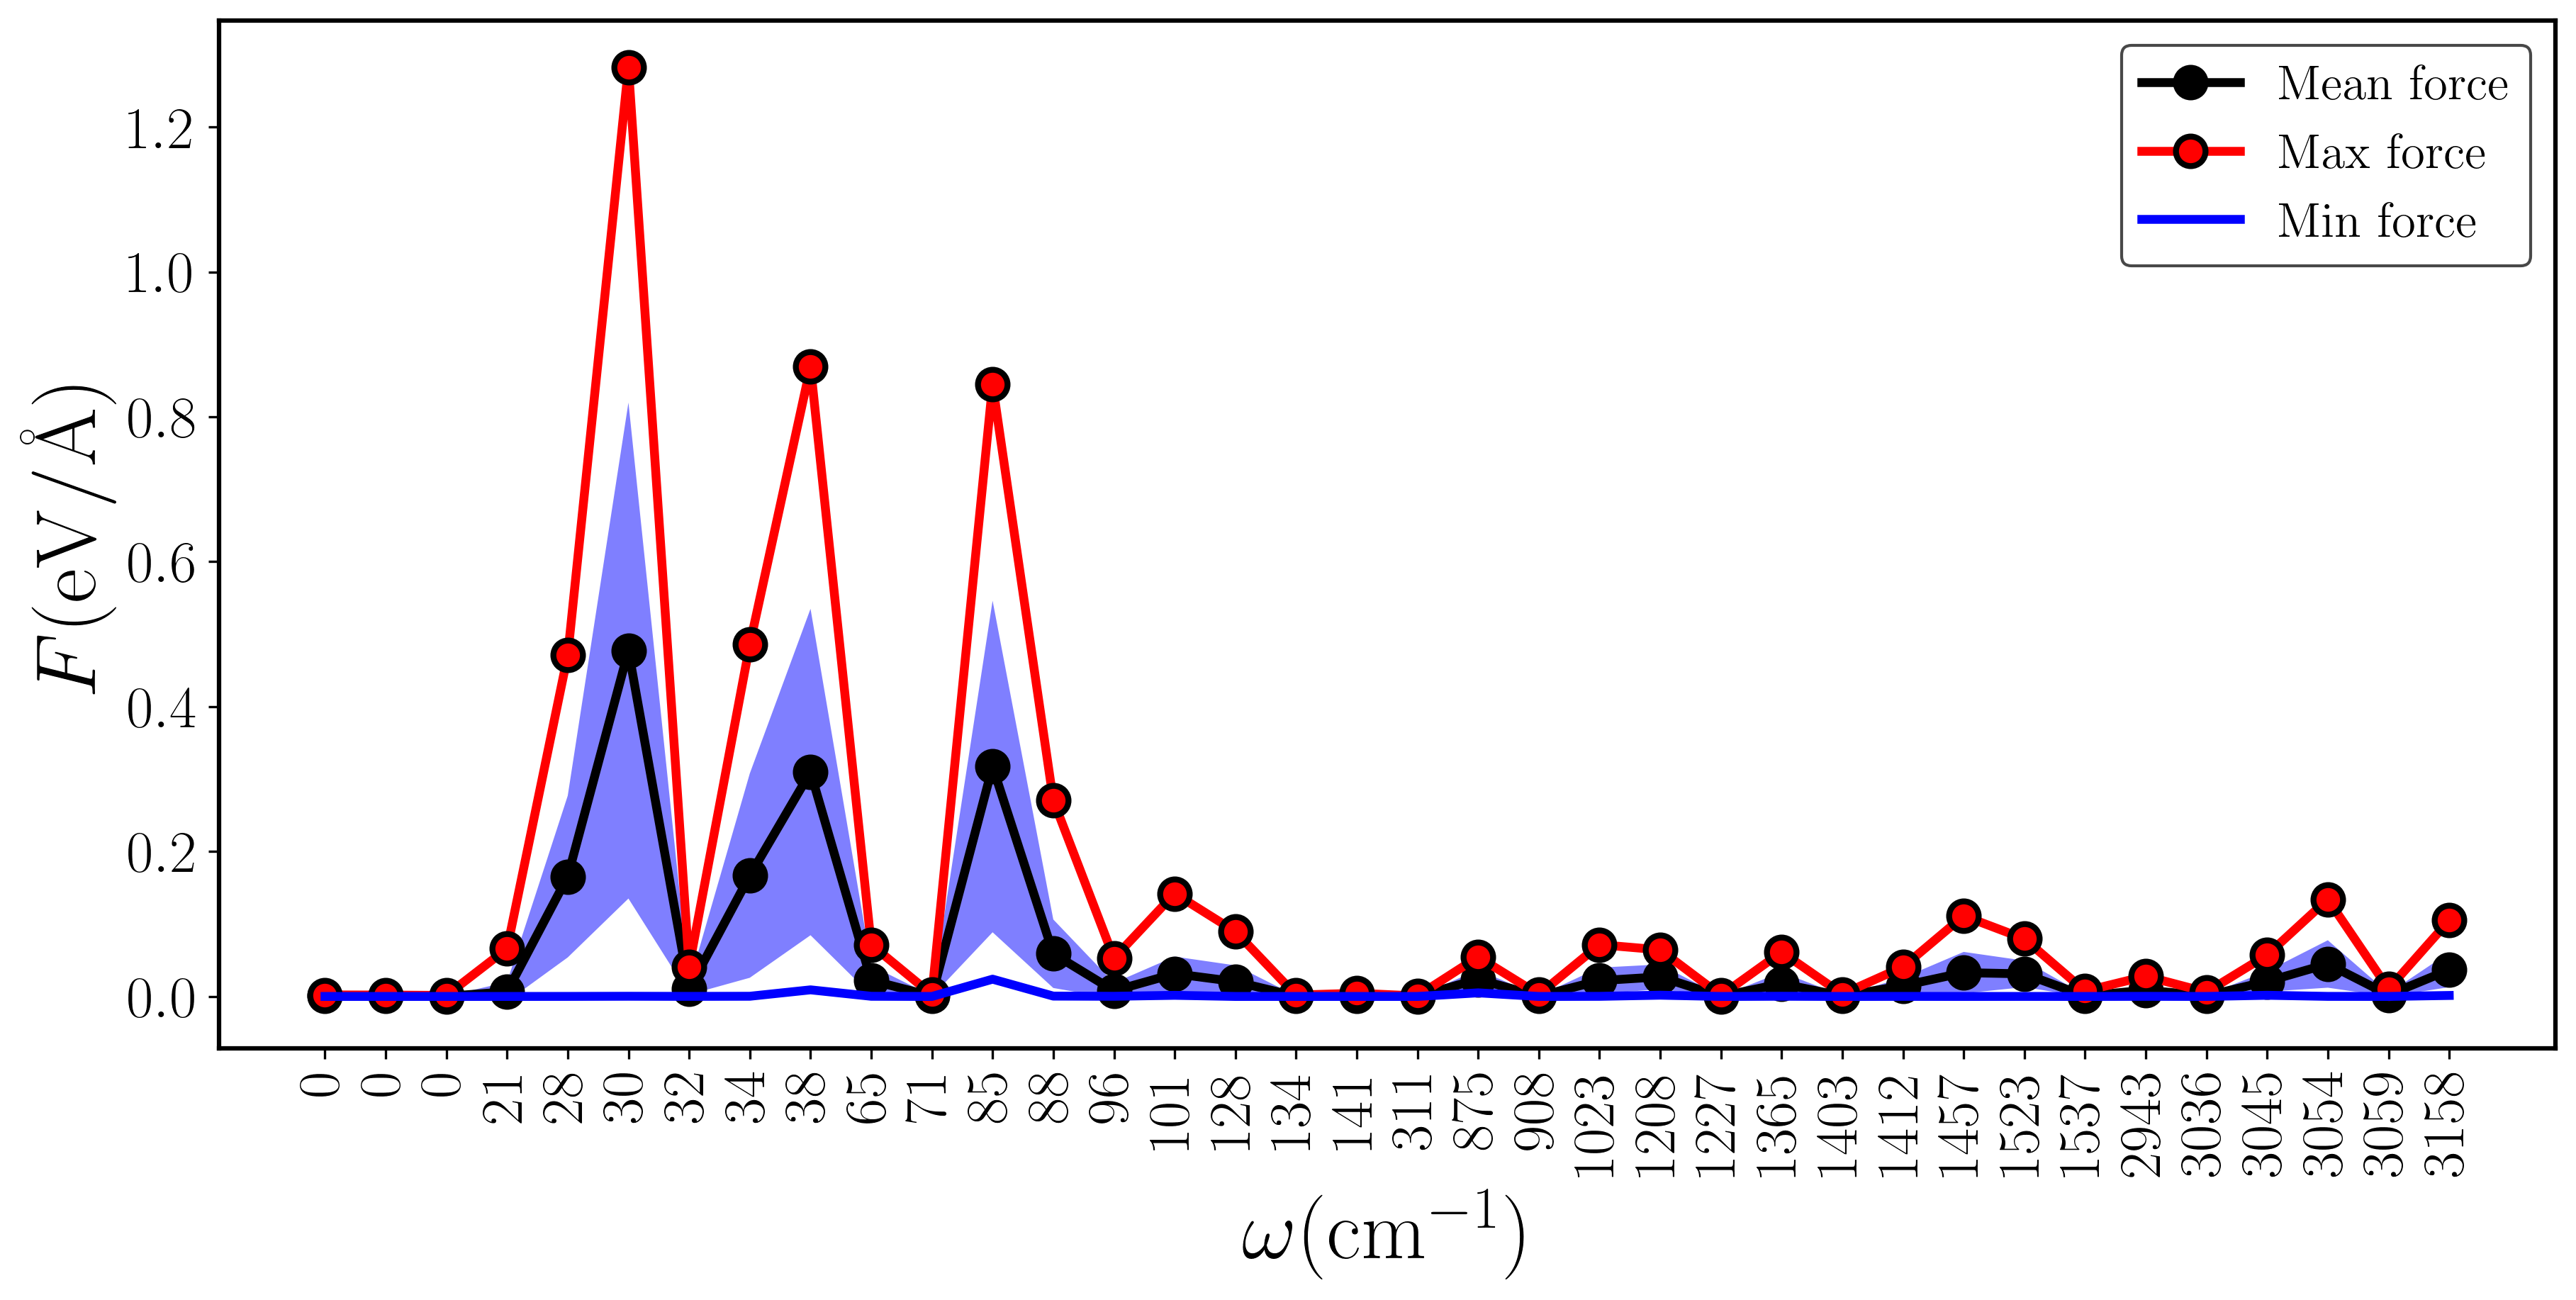

In [ ]:
plt.figure(dpi=300, figsize=(12, 6))

modes = [imode for imode in range(36)]

plt.plot(modes, MEAN_FORCE, 'ko-', label='Mean force')

plt.fill_between(modes, MEAN_FORCE - STD_FORCE, MEAN_FORCE + STD_FORCE, facecolor='blue', alpha=0.5)

plt.plot(modes, MAX_FORCE, 'ro-', label='Max force')
plt.plot(modes, MIN_FORCE, 'b-', label='Min force')


    
plt.ylabel(r'$F (\mathrm{eV/\AA})$')
plt.xlabel(r'$\omega (\mathrm{cm^{-1}})$')
plt.legend()

plt.xticks([imode for imode in range(36)], YTICKS, rotation = 90)
print(' ');


# Stress vs excitons concentration

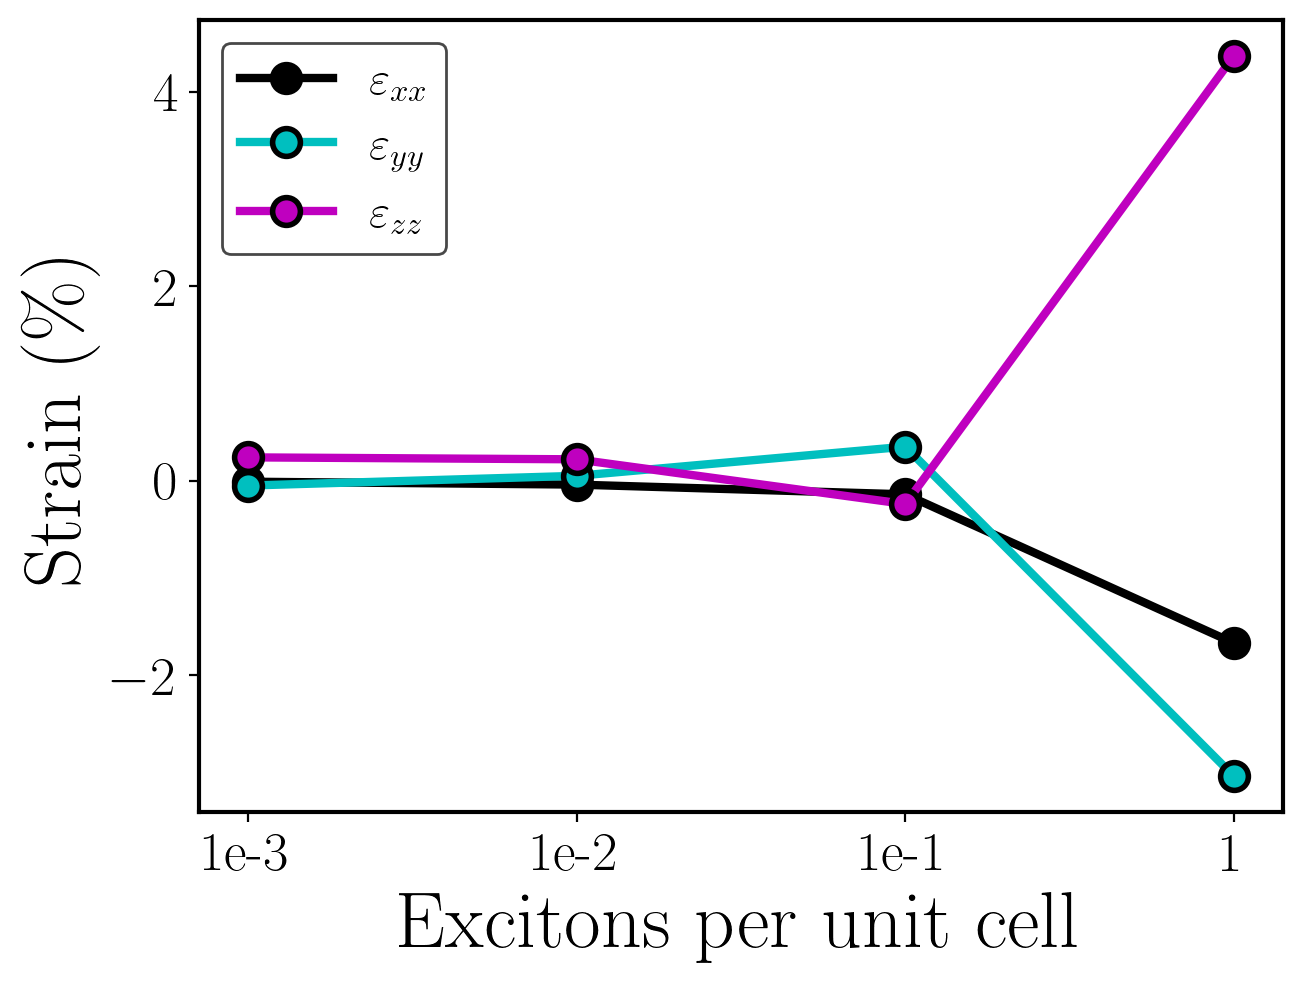

In [ ]:
exciton_per_cm3 = [4.2E21, 4.2E20, 4.2E19, 4.2E18]
exciton_per_unit_cell = [1, 1e-1, 1e-2, 1e-3]
exciton_per_unit_cell = ['1', '1e-1', '1e-2', '1e-3']

stress_xx = [-1.67, -0.14, -0.04, -0.01]
stress_yy = [-3.04, 0.35, 0.05, -0.05]
stress_zz = [4.37, -0.24, 0.22, 0.24]

plt.plot([4-i for i in range(4)], stress_xx, '-o', label=r'$\varepsilon_{xx}$')
plt.plot([4-i for i in range(4)], stress_yy, '-o', label=r'$\varepsilon_{yy}$')
plt.plot([4-i for i in range(4)], stress_zz, '-o', label=r'$\varepsilon_{zz}$')

plt.xticks([4-i for i in range(4)], exciton_per_unit_cell)
plt.xlabel('Excitons per unit cell')
plt.ylabel('Strain (\%)')

plt.legend()